In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random

In [24]:
def data():
#the data is in the same directory as this program
#merge data into 2 arrays
#of the form (start, finish) for start1 and finish1 
#and the same for start2 and finish2
    times_1 = np.dstack((np.genfromtxt('start1.csv', delimiter=','), np.genfromtxt('finish1.csv', delimiter=',')))[0]
    times_2 = np.dstack((np.genfromtxt('start2.csv', delimiter=','), np.genfromtxt('finish2.csv', delimiter=',')))[0]
    return times_1,times_2

In [25]:
x,y = data()
print(x[3])

[6.15   7.3636]


In [57]:
def sort_by_dep(times):
    return np.array(sorted(times, key=lambda times: times[1]))

In [58]:
#this function returns an array contains the flights that could not be scheduled
def bad_apples(times):
    
    k=0
    bad_apples = []
    if (len(times)<2):
        return bad_apples
    for i in range(1,len(times)):
        if (times[k][1]<=times[i][0]):
            k = i
        else:
            bad_apples.append(times[i])
            
    return bad_apples


In [109]:
def count_gates(times):
    
    num_gates = 2
    bad_bois = bad_apples(times)
    while(len(bad_bois)>1):
        bad_bois = bad_apples(bad_bois)
        num_gates+=1
    return num_gates

In [110]:
def question_one():
    
    #get and format data
    time_set_1,time_set_2 = data()
    time_set_1 = sort_by_dep(time_set_1)
    time_set_2 = sort_by_dep(time_set_2)
    min_gates_one = count_gates(time_set_1)
    min_gates_two = count_gates(time_set_2)
    
    print("The first set of planes requires",min_gates_one,"gates in order to avoid conflicts.")
    print("The second set of planes requires",min_gates_two,"gates in order to avoid conflicts.")
    
    return 
    

In [111]:
question_one()

The first set of planes requires 23 gates in order to avoid conflicts.
The second set of planes requires 25 gates in order to avoid conflicts.


In [62]:
def uniform_rand_generator(upper_bound):
    return random.uniform(0,upper_bound)

In [63]:
def delay_flights(times,upper_bound,fraction):
    
    for i in (choose_indeces(fraction,len(times))):
        x = uniform_rand_generator(upper_bound)
        times[i][0]+=x
        
    for i in (choose_indeces(fraction,len(times))):
        times[i][1]+=uniform_rand_generator(upper_bound)+x
    
            
        
    return times

In [64]:
def choose_indeces(fraction,length):
    return np.random.choice(length, int(fraction*length))

In [89]:
def question_2(fraction,upper_bound):    
    
    time_set_1,time_set_2 = data()
    time_set_1 = delay_flights(time_set_1,upper_bound,fraction)
    time_set_2 = delay_flights(time_set_2,upper_bound,fraction)
    time_set_1 = sort_by_dep(time_set_1)
    time_set_2 = sort_by_dep(time_set_2)
    
    min_gates_one = count_gates(time_set_1)
    min_gates_two = count_gates(time_set_2)
    
    #print("The first set of planes with a max delay of",upper_bound , "on",int(fraction*100),"percent of planes requires",min_gates_one,"gates in order to avoid conflict")
    #print("The second set of planes with a max delay of",upper_bound,"on",int(fraction*100),"percent of planes requires",min_gates_two,"gates in order to avoid conflict")
    
    return min_gates_one, min_gates_two

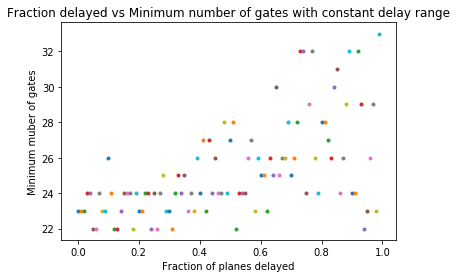

In [129]:
for i in [x * 0.01 for x in range(0, 100)]:
    min_gate_one, min_gate_two = question_2(i,1)
    plt.scatter(i, min_gate_one, marker='.')
    plt.title("Fraction delayed vs Minimum number of gates with constant delay range")
    plt.xlabel('Fraction of planes delayed')
    plt.ylabel('Minimum muber of gates')


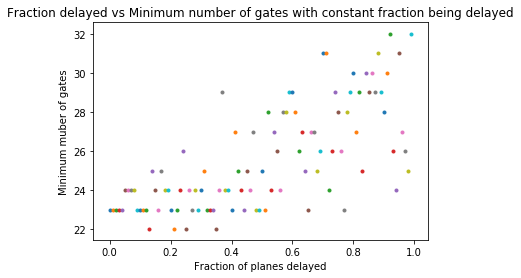

In [128]:
for i in [x * 0.01 for x in range(0, 100)]:
    min_gate_one, min_gate_two = question_2(1,i)
    plt.scatter(i, min_gate_one, marker='.')
    plt.title("Delay vs Minimum number of gates with constant fraction being delayed")
    plt.xlabel('delay in hours')
    plt.ylabel('Minimum muber of gates')
    
    

In [87]:
x,y = question_2(0.5,80)

The first set of planes with a max delay of 80 on 50 percent of planes requires 47 gates in order to avoid conflict
The second set of planes with a max delay of 80 on 50 percent of planes requires 50 gates in order to avoid conflict
